In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
a = 20
d = 20
tm0 = 50
t_m = tm0 * np.pi/180
def phi(t):
    return np.pi/4 + (6 + 0.1*t) * t
    
def r(t):
    return d/2 * (1 - phi(t)/phi(t_m))

def Fp(x,y,t):
    return -1/np.sqrt((x + r(t)*np.cos(phi(t)))**2 + (y + r(t)*np.sin(phi(t)))**2)                                                            \
           -1/np.sqrt((x - r(t)*np.cos(phi(t)))**2 + (y - r(t)*np.sin(phi(t)))**2)     
         
X = np.arange(-1*a, a)
Y = np.arange(-1*a, a)
x,y=np.meshgrid(X,Y)

In [3]:
imageList = []
for t in range(tm0):
    imageList.append(Fp(x,y,t*np.pi/180))

# Fast

<IPython.core.display.Javascript object>


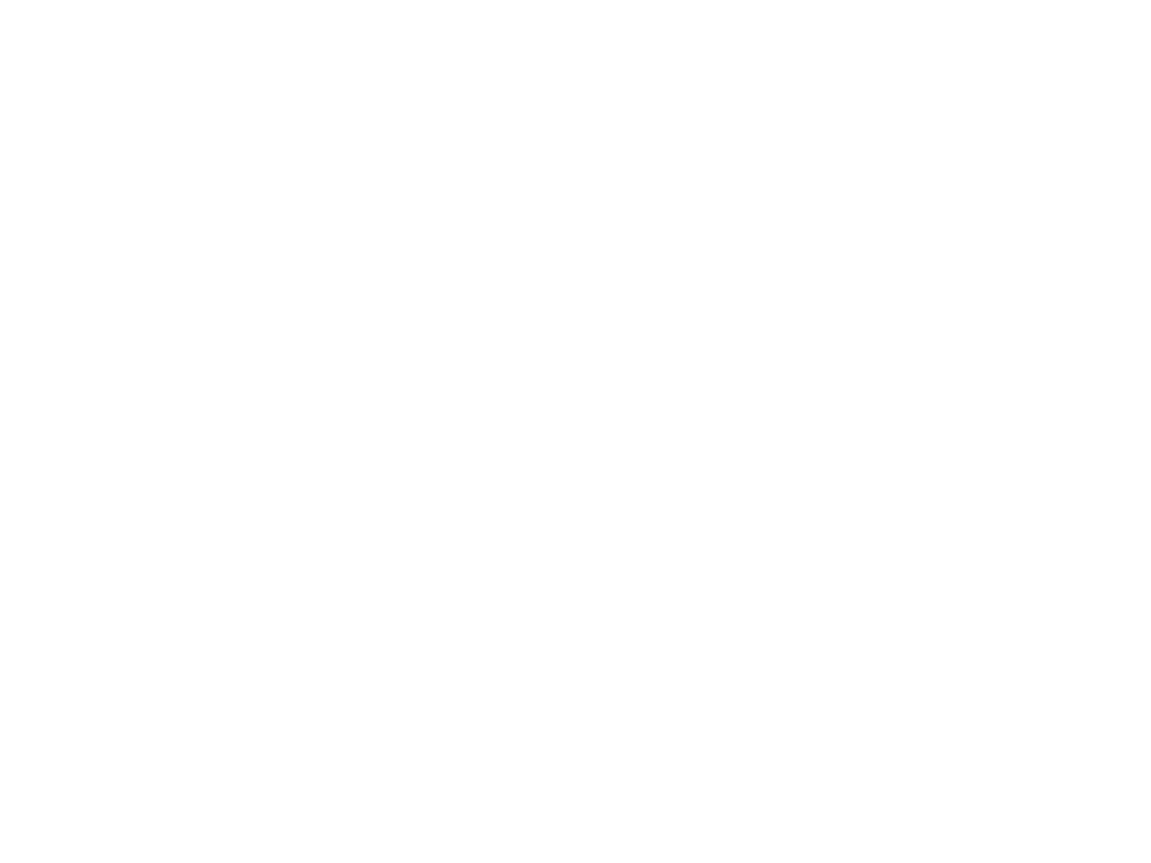

In [4]:
fig = plt.figure()
ims = []
for i in range(len(imageList)):
    im = plt.pcolormesh(imageList[i], animated = True)
    ims.append([im])
    
ani1 = animation.ArtistAnimation(fig, ims, blit=True, repeat_delay=2000)
plt.close()

# Show the animation
HTML(ani1.to_html5_video())

# Slow

<IPython.core.display.Javascript object>


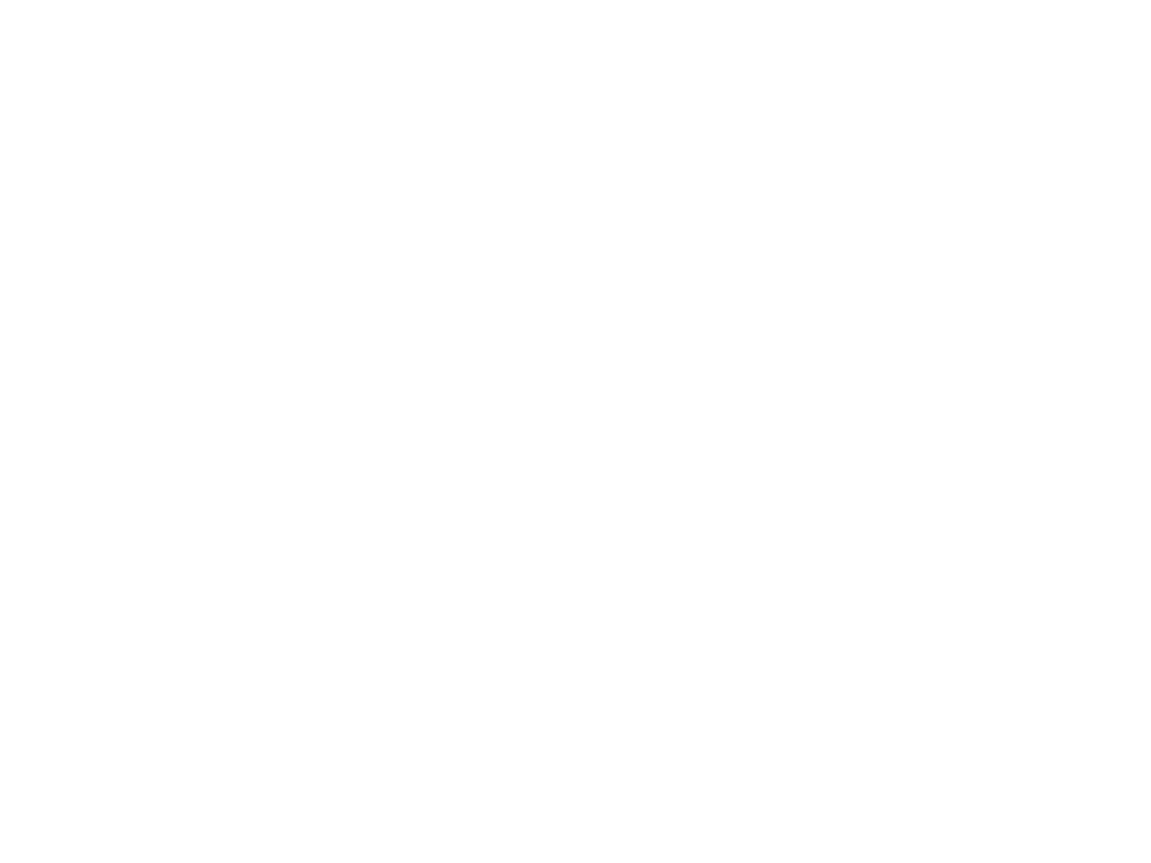

animation creation took:  2.5030248165130615


In [6]:
t1 = time.time()
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ims = []
for i in range(len(imageList)):
    im = ax.plot_surface(x,y,imageList[i],cmap=plt.cm.YlGnBu_r, antialiased=False, animated=True)
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, blit=True, repeat_delay=2000)
plt.close()
t2 = time.time()
print("animation creation took: ", t2 - t1)

In [ ]:
t3 = time.time()
ani2 = ani.to_html5_video()
t4 = time.time()
print("animation to html5 video took: ", t4 - t3)

In [ ]:
HTML(ani2)

<IPython.core.display.Javascript object>


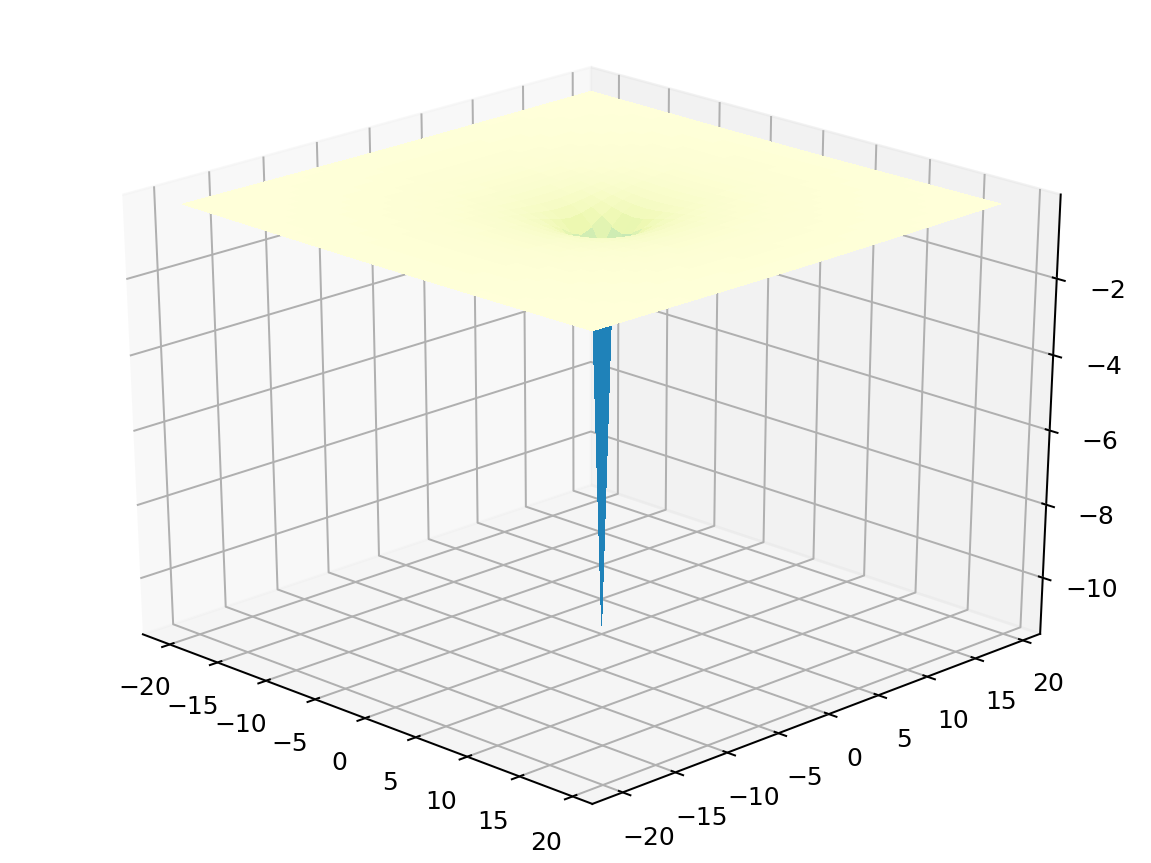

In [5]:
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.plot_surface(x,y,imageList[i],cmap=plt.cm.YlGnBu_r, antialiased=False)